<a href="https://colab.research.google.com/github/priyankagupta0/anime-colorization/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [25]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
!kaggle datasets download -d ktaebum/anime-sketch-colorization-pair

anime-sketch-colorization-pair.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
from zipfile import ZipFile
file_name = 'anime-sketch-colorization-pair.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [37]:
!pip install keras

In [38]:
import glob
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
imgs_path = glob.glob("/content/data/train/*.png")
len(imgs_path)

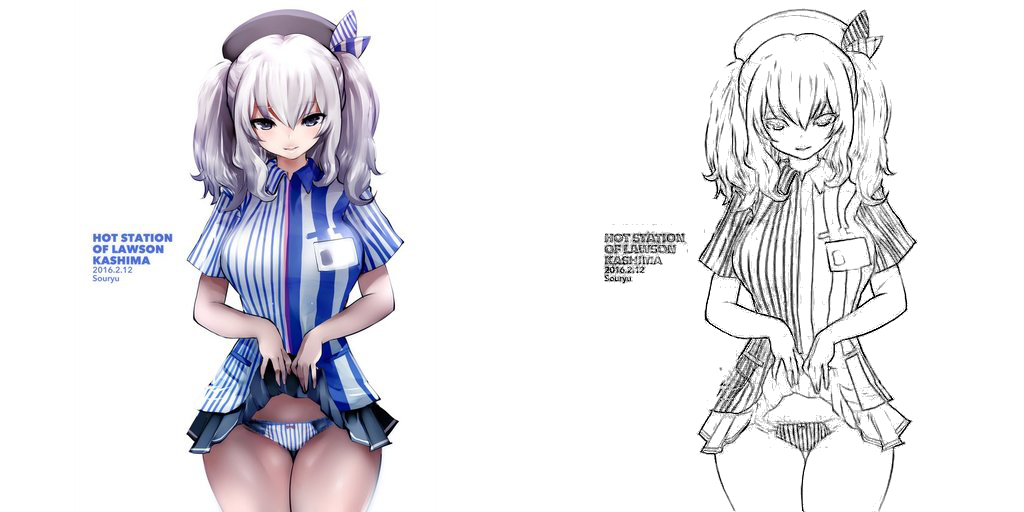

In [41]:
import random
img = tf.keras.preprocessing.image.load_img(random.choice(imgs_path))
img

In [42]:
# creating a load image function

In [ ]:
def read_img(path):
  img = tf.io.read_file(path) #reads the content of a file
  img = tf.io.decode_image(img,channels = 3) #decode the img file to tensor. channels are the color channels
  return img

def normalize(mask, img):
  # casting to float32 and scaling between -1 to 1. GANs expect i/p data to be in that range
  mask = tf.cast(mask,tf.float32)